In [26]:
import xgboost as xgb
import shap
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from helper.feature_extract import extract_highest_amplitude_features_with_mp

In [4]:
#Import data
df_mpa = pd.read_table('../data/data_mpa.txt', sep=' ')
df_mpa = extract_highest_amplitude_features_with_mp(df=df_mpa, sensor_types=[['M01', 'M02', 'M03', 'M04']], create_one_sensor_feature=True, n_processes=4, keep_columns=False)
df_mpa = df_mpa.drop(["start_time","packnr"], axis=1)
df_spg = pd.read_table('../data/data_spg.txt', sep=' ')
df_spg = extract_highest_amplitude_features_with_mp(df=df_spg, sensor_types=[['G01', 'G02']], create_one_sensor_feature=True, n_processes=4, keep_columns=False)
df_spg = df_spg.drop(["start_time","packnr"], axis=1)
df_sps = pd.read_table('../data/data_sps.txt', sep=' ')
df_sps = extract_highest_amplitude_features_with_mp(df=df_sps, sensor_types=[['G01', 'G02'], ['M01'], ['S01']], create_one_sensor_feature=True, n_processes=4, keep_columns=False)
df_sps = df_sps.drop(["start_time","packnr"], axis=1)

INFO || Extracting Max Features for types: ['M01', 'M02', 'M03', 'M04']
INFO || Extracting Max Features for types: ['G01', 'G02']
INFO || Extracting Max Features for types: ['G01', 'G02']
INFO || Extracting Max Features for types: ['M01']
INFO || Extracting Max Features for types: ['S01']


In [12]:
X, y = df_mpa.drop(['size_mm'], axis=1), np.log(df_mpa['size_mm'])
y =y.astype(np.str)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 102)
mpa_model= xgb.XGBRegressor()
mpa_model.fit(X_train, y_train)
mpa_model.score(X_test,y_test)

0.801874822634772

In [6]:
X, y = df_spg.drop(['size_mm'], axis=1), np.log(df_spg['size_mm'])
y =y.astype(np.str)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 102)
spg_model= xgb.XGBRegressor()
spg_model.fit(X_train, y_train)
spg_model.score(X_test,y_test)

0.8481573026196519

In [134]:
X, y = df_sps.drop(['size_mm'], axis=1), np.log(df_sps['size_mm'])
y =y.astype(np.str)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 102)
sps_model= xgb.XGBRegressor()
sps_model.fit(X_train, y_train)
sps_model.score(X_test,y_test)

0.8783101716218492

# MPA

In [130]:
explainer = shap.Explainer(mpa_model)
shap_values = explainer(X)

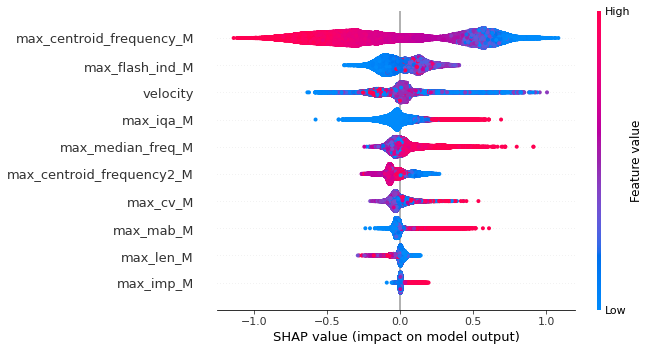

In [131]:
shap.plots.beeswarm(shap_values)

In [ ]:
df_mpa.describe().loc[['min','max']]

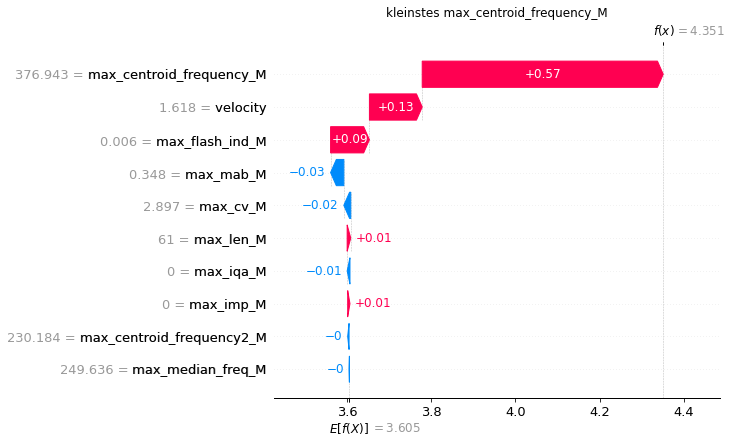

In [93]:
plt.title("kleinstes max_centroid_frequency_M")
shap.plots.waterfall(shap_values[15644])

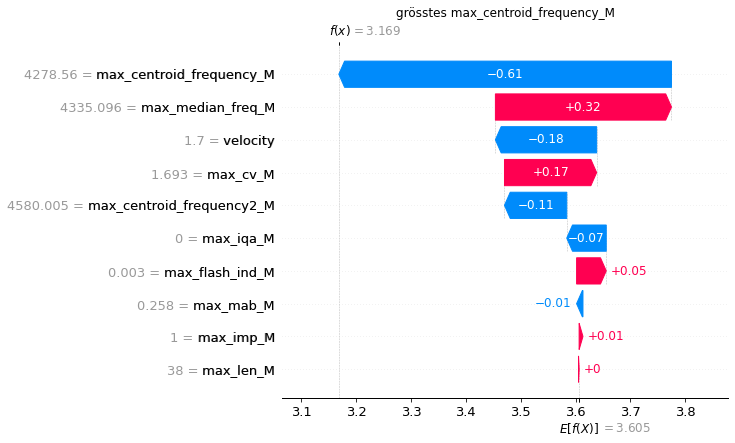

In [94]:
plt.title("grösstes max_centroid_frequency_M")
shap.plots.waterfall(shap_values[49235])

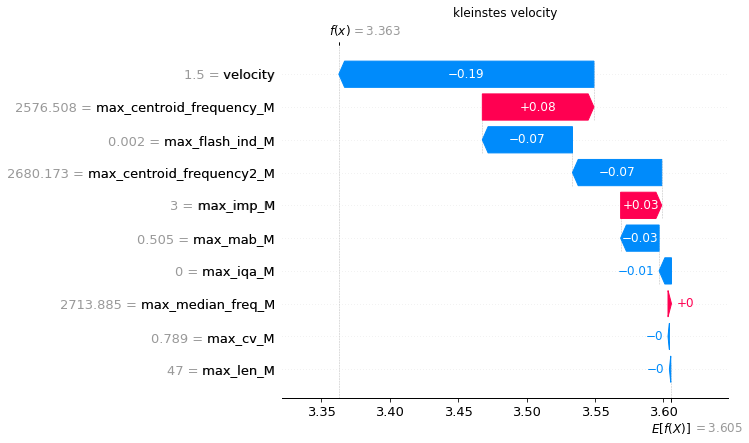

In [96]:
plt.title("kleinstes velocity")
shap.plots.waterfall(shap_values[527])

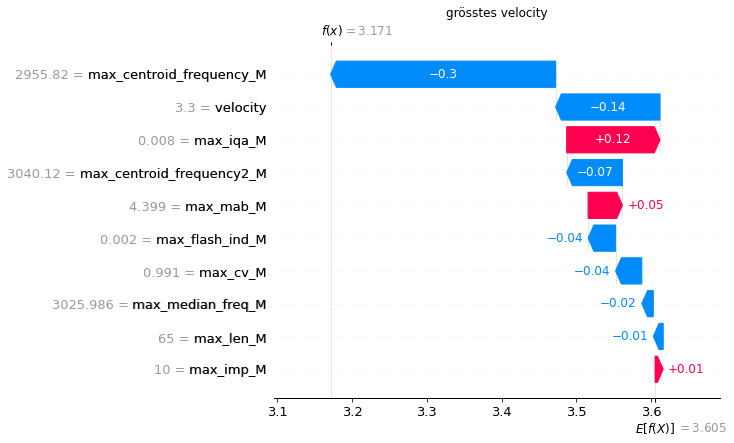

In [97]:
plt.title("grösstes velocity")
shap.plots.waterfall(shap_values[43373])

# SPG

In [128]:
explainer = shap.Explainer(spg_model)
shap_values = explainer(X)

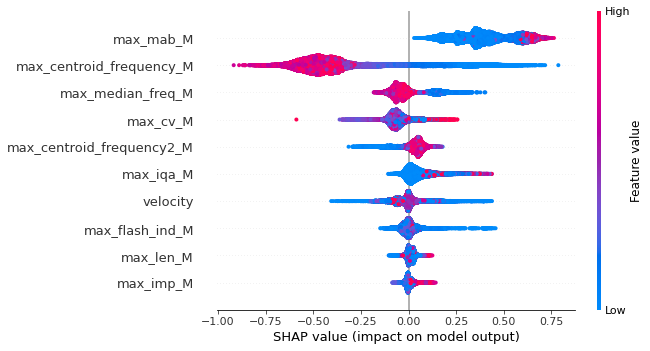

In [129]:
shap.plots.beeswarm(shap_values)

In [ ]:
df_spg.sort_values(by=['velocity'])

In [114]:
df_spg.describe().loc[['min','max']]

,velocity,size_mm,max_centroid_frequency_G,max_centroid_frequency2_G,max_median_freq_G,max_flash_ind_G,max_cv_G,max_iqa_G,max_mab_G,max_imp_G,max_len_G
min,1.5,5.0,259.582928,123.262434,147.579891,0.000291,0.210665,6.049210e-08,0.013522,0.0,37.0
max,3.3,171.5,3209.746761,3444.486374,3547.974733,0.188792,5.411462,1.326227e-01,10.903055,102.0,1000.0


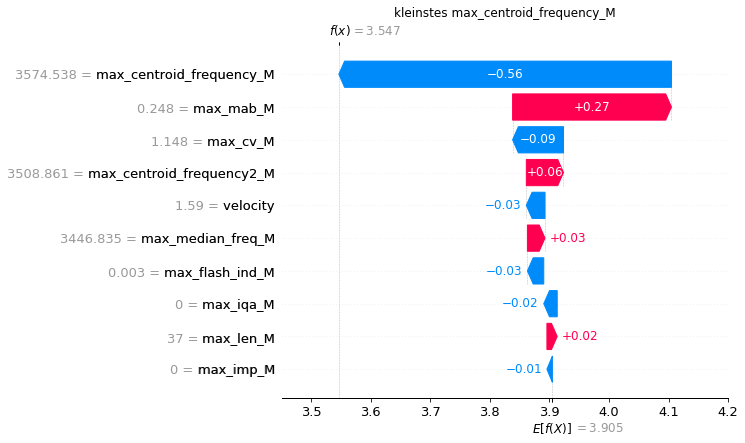

In [116]:
plt.title("kleinstes max_centroid_frequency_M")
shap.plots.waterfall(shap_values[9091])

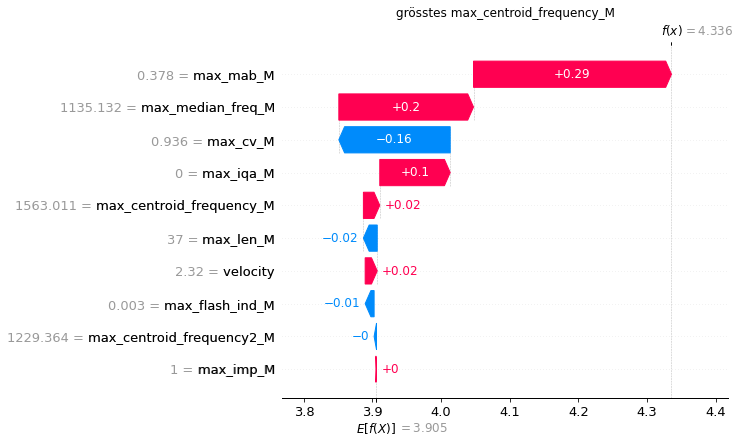

In [117]:
plt.title("grösstes max_centroid_frequency_M")
shap.plots.waterfall(shap_values[24929])

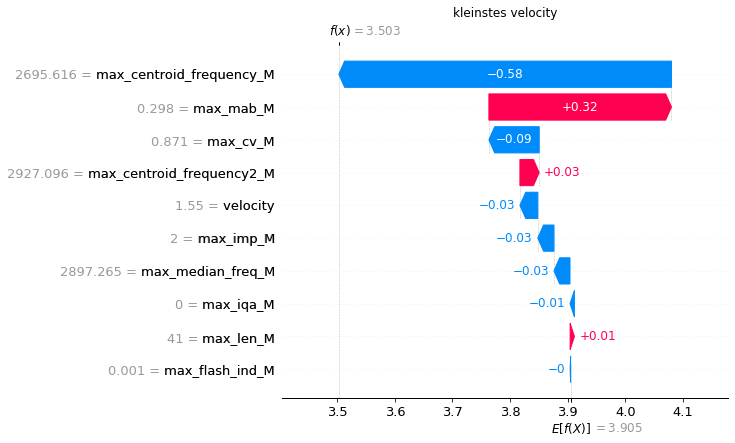

In [120]:
plt.title("kleinstes velocity")
shap.plots.waterfall(shap_values[0])

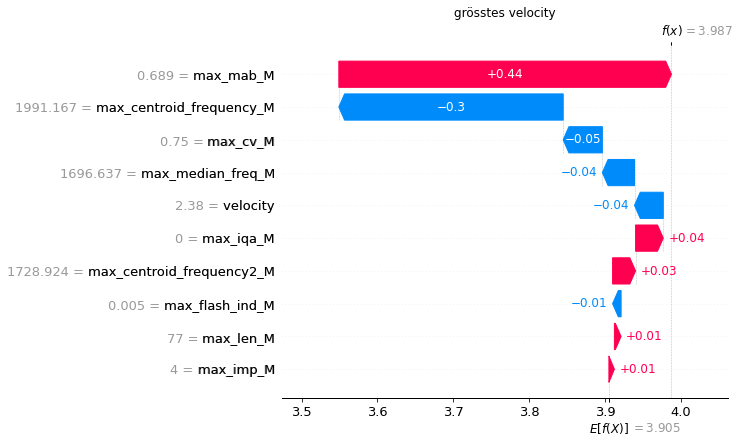

In [119]:
plt.title("grösstes velocity")
shap.plots.waterfall(shap_values[26231])

# SPS

In [135]:
explainer = shap.Explainer(sps_model)
shap_values = explainer(X)

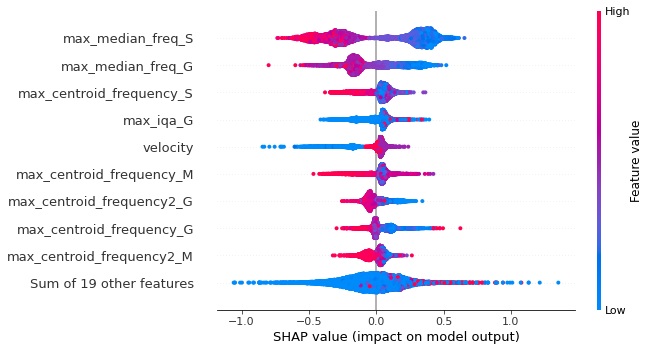

In [136]:
shap.plots.beeswarm(shap_values)

In [ ]:
df_sps.sort_values(by=['velocity'])

In [121]:
df_sps.describe().loc[['min','max']]

,velocity,size_mm,max_centroid_frequency_G,max_centroid_frequency2_G,max_median_freq_G,max_flash_ind_G,max_cv_G,max_iqa_G,max_mab_G,max_imp_G,...,max_len_M,max_centroid_frequency_S,max_centroid_frequency2_S,max_median_freq_S,max_flash_ind_S,max_cv_S,max_iqa_S,max_mab_S,max_imp_S,max_len_S
min,1.8,5.0,535.504485,67.037284,169.528248,0.001314,0.603750,1.433258e-10,0.000625,0.0,...,72.0,834.756278,65.998761,166.612968,0.001808,0.531951,0.000816,2.0,0.0,72.0
max,3.2,171.5,10498.329425,10924.250300,12400.950764,0.673765,7.162637,1.739608e-02,2.927311,81.0,...,4000.0,11652.612343,11877.500665,12277.380808,0.442270,7.531391,167074.739252,3007.0,411.0,4000.0


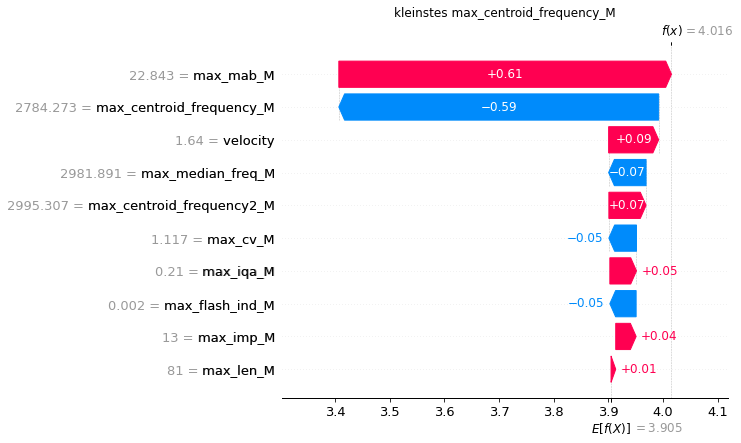

In [123]:
plt.title("kleinstes max_centroid_frequency_M")
shap.plots.waterfall(shap_values[7129])

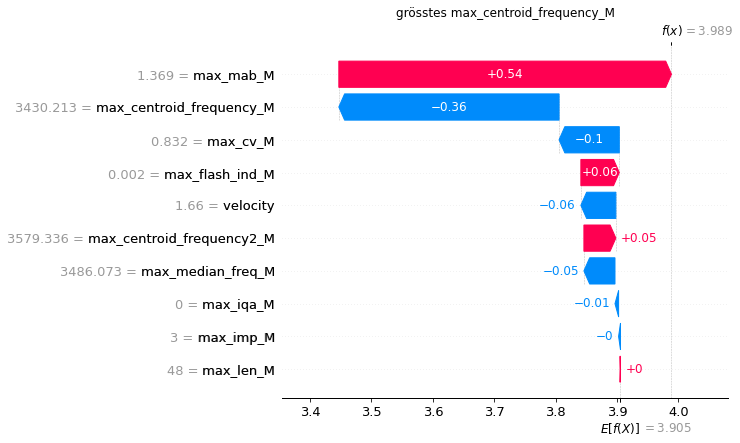

In [124]:
plt.title("grösstes max_centroid_frequency_M")
shap.plots.waterfall(shap_values[7610])

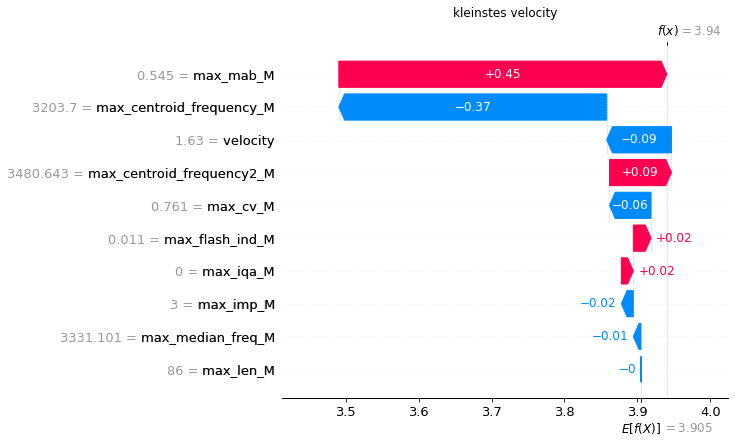

In [126]:
plt.title("kleinstes velocity")
shap.plots.waterfall(shap_values[1783])

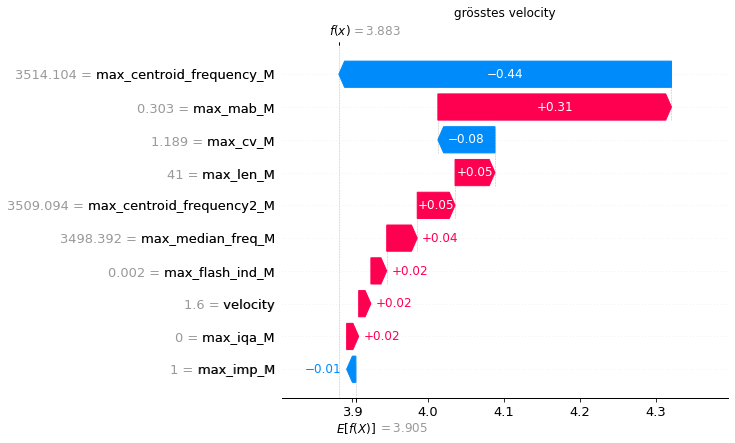

In [127]:
plt.title("grösstes velocity")
shap.plots.waterfall(shap_values[11253])